<AxesSubplot:xlabel='squareMeters', ylabel='price'>

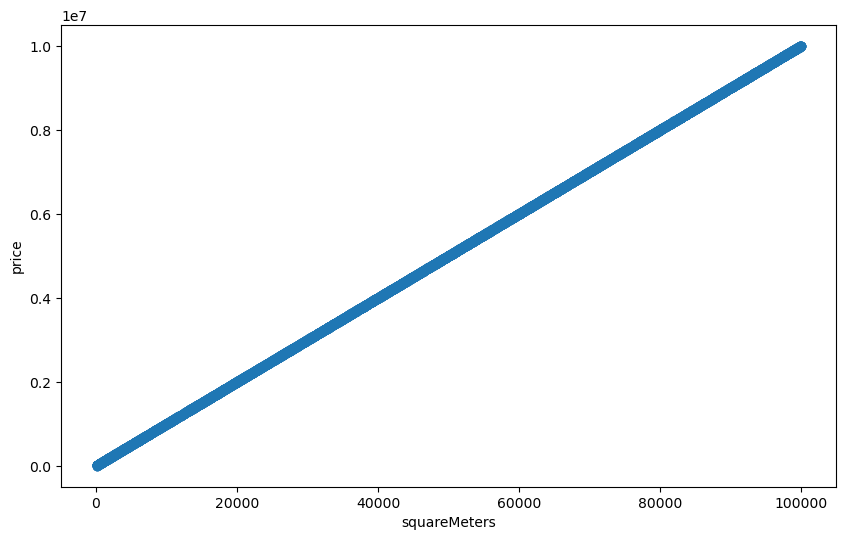

In [7]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
paris_housing_path = r"C:\Users\HP\Desktop\ParisHousing.csv"
df = pd.read_csv(paris_housing_path)
df.columns
#data visualization
plt.figure(figsize=(10,6))
sns.regplot(x = df["squareMeters"] , y =df["price"])



In [2]:
y = df['price']
house_features = ['squareMeters']
x = df[house_features]
x.head()

,squareMeters
0,75523
1,80771
2,55712
3,32316
4,70429


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[ ('num', numerical_transformer), ('cat', categorical_transformer)])
x.head()

,squareMeters
0,75523
1,80771
2,55712
3,32316
4,70429


In [6]:
#split the training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =40)


#apply the model 
regressor = RandomForestRegressor()

regressor.fit(x_train, y_train)

y_prediction = regressor.predict(x_test)

#get the statistics of the predicted values
#convert the array to panda series
prediction_pd = pd.Series(y_prediction)
prediction_pd.describe()
#make the model user interactive
squareMeters = input("squareMeters")
squareMetres = int(squareMeters)

price = regressor.predict([[squareMeters]])
print(price)



squareMeters7500000
[10001969.46499999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
